In [1]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 100kB/s 
     |████████████████████████████████| 1.7MB 45.0MB/s 
     |████████████████████████████████| 890kB 40.4MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=49650025c7678ca7d0dc97ac9e6119d09975b039a0b308e7af31b5faf1c757c5
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel_details.csv to hotel_details.csv


In [4]:
import io
hotel_data = pd.read_csv(io.BytesIO(uploaded['hotel_details.csv']))

In [5]:
hotel_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
0,0,La Quinta,5820 Walden Rd,Beaumont,NaN,NaN,"Lodging,Motels,Hotels,Meeting & Event Planning..."
1,1,The Point,Po Box 1327,Saranac Lake,NaN,NaN,"Hotels,Hotel,Restaurants"
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels"
3,3,Economy Inn,1223 Radford Blvd,Dillon,2.0,Rs.4694,Hotels
4,4,Holiday Inn Express & Suites Lenoir City (knox...,1112 Highway 321 N,Lenoir City,2.0,Rs.6146,"Banquet Rooms,Reception Centers,Lodging,Hotels..."


In [6]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [7]:
import io
rating_data = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

In [8]:
rating_data.head()

,User_id,Hotel_id,Rating
0,15400,0,1.0
1,15740,1,5.0
2,13760,1,5.0
3,11027,1,5.0
4,10306,1,5.0


In [9]:
# Checking for missing values
pd.isnull(hotel_data).any()

Hotel_id          False
Hotel             False
Address           False
City              False
Hotel_Type         True
Price              True
Hotel_Category    False
dtype: bool

In [10]:
hotel_data = hotel_data.dropna()
hotel_data = hotel_data.reset_index(drop=True)
print('Shape of dataset ',hotel_data.shape)
print(hotel_data.columns)

Shape of dataset  (1593, 7)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Hotel_Type', 'Price',
       'Hotel_Category'],
      dtype='object')


In [11]:
# Checking for missing values
pd.isnull(rating_data).any()

User_id     False
Hotel_id    False
Rating       True
dtype: bool

In [12]:
rating_data = rating_data.dropna()
rating_data = rating_data.reset_index(drop=True)
print('Shape of dataset ',rating_data.shape)
print(rating_data.columns)

Shape of dataset  (23365, 3)
Index(['User_id', 'Hotel_id', 'Rating'], dtype='object')


In [13]:
len(hotel_data)


1593

In [14]:
hotel_data.tail()


,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
1588,3126,Sheraton Mission Valley San Diego Hotel,1433 Camino Del Rio South,San Diego,3.0,Rs.9373,Hotels
1589,3127,Holiday Inn Canyon De Chelly,Bia Route 7 Garcia Trading Post,Chinle,3.0,Rs.7196,Hotels
1590,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V..."
1591,3129,Quality Inn,2120 Jameson Pl S W,Decatur,2.0,Rs.7373,"Lodges,Hotels,Hotels & Motels,Lodging,Motels"
1592,3130,Quality Inn,12439 Northwest Fwy,Houston,2.0,Rs.7373,"Hotel & Motel Reservations,Hotels,Hotels & Mot..."


In [15]:
hotel_data['List Index'] = hotel_data.index
hotel_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index
0,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0
1,3,Economy Inn,1223 Radford Blvd,Dillon,2.0,Rs.4694,Hotels,1
2,4,Holiday Inn Express & Suites Lenoir City (knox...,1112 Highway 321 N,Lenoir City,2.0,Rs.6146,"Banquet Rooms,Reception Centers,Lodging,Hotels...",2
3,5,Country Inn and Suites By Carlson Corbin,1888 Cumberland Falls Hwy,Corbin,2.0,Rs.4332,"Hotels,Family-Friendly Hotels,Budget Hotels,Ho...",3
4,6,Ambassadors Inn and Suites,716 21st St,Virginia Beach,2.0,Rs.4782,Hotels,4


With that, let's merge the ratings dataframe into the hotel details one so we can have the List Index values in both dataframes. 

In [16]:
#Merging hotel_data with rating_data by Hotel_id
merged_data = hotel_data.merge(rating_data, on='Hotel_id')

#Displaying the result
merged_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,User_id,Rating
0,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,17618,2.0
1,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,17602,4.0
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,17601,4.0
3,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,17600,1.0
4,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,17599,4.0


Let's also group up the users by their user IDs and take a look at one of them.



In [17]:
#Group up by UserID
userGroup = merged_data.groupby('User_id')
userGroup.first().head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Rating
User_id,,,,,,,,,
0,3020,Regenta Place By Royal Orchid Hotel,"11, Park Road, Near Indian Express Near Indian...",Bengaluru,4.0,Rs.1103,Hotels,1486,5.0
1,3099,Shangri-La Hotel Bengaluru,"Palace Road, Bengaluru 560052 India",Bengaluru,5.0,Rs.9529,"Hotels,Luxury",1563,5.0
2,3046,Radisson Bengaluru City Center,"2 Gangadhar Chetty Road Ulsoor, Bengaluru 5600...",Bengaluru,4.0,Rs.4361,Hotels,1512,5.0
4,2189,Metro Points Hotel-Washington North,8500 Annapolis Rd,Hyattsville,3.0,Rs.5442,"Hotels,Hotel",1074,5.0
5,1607,Best Western Plus Kelly Inn Suites,4915 Southgate Dr,Billings,3.0,Rs.7474,"Hotels,Lodging,Hotels Motels,Family-friendly H...",819,4.0


Now, we can start formatting the data into input for the RBM. We're going to store the normalized users ratings into a list of lists called train_X.

In [18]:
#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
trX = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every movie's rating
    temp = [0]*len(hotel_data)
    #For each movie in curUser's movie list
    for num, hotel in curUser.iterrows():
        #Divide the rating by 5 and store it
        temp[hotel['List Index']] = hotel['Rating']/5.0
    #Now add the list of ratings into the training list
    trX.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

**Models parameter**

Next, let's start building our RBM with Tensorflow. We'll begin by first determining the amount of hidden layers and then creating placeholder variables for storing our visible layer biases, hidden layer biases and weights that connect the hidden layer with the visible one. We will be arbitrarily setting the amount of hidden layers to 20. You can freely set this value to any number you want since each neuron in the hidden layer will end up learning a feature.

In [19]:
hiddenUnits = 20
visibleUnits = len(hotel_data)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique hotels
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

We then move on to creating the visible and hidden layer units and setting their activation functions. In this case, we will be using the tf.sigmoid and tf.relu functions as nonlinear activations since it's what is usually used in RBM's.

In [20]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

Now we set the RBM training parameters and functions.



In [21]:
#Learning rate
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

And set the error function, which in this case will be the Mean Absolute Error Function.



In [22]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

We also have to initialize our variables. Thankfully, NumPy has a handy zeros function for this. We use it like so:

In [23]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Now we train the RBM with 15 epochs with each epoch using 10 batches with size 100. After training, we print out a graph with the error by epoch.

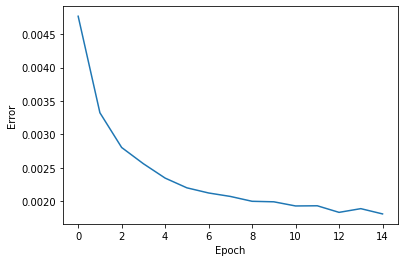

In [24]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_nb}))
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

**Recommendation**

We can now predict movies that an arbitrarily selected user might like. This can be accomplished by feeding in the user's visited hotels preferences into the RBM and then reconstructing the input. The values that the RBM gives us will attempt to estimate the user's preferences for hotels that he hasn't visited based on the preferences of the users that the RBM was trained on.

In [25]:
#Selecting the input user
inputUser = [trX[75]]

In [26]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

We can then list the 20 most recommended hotels for our mock user by sorting it by their scores given by our model.

In [27]:
hotel_data["Recommendation Score"] = rec[0]
hotel_data.sort_values(["Recommendation Score"], ascending=False).head(20)

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Recommendation Score
7,9,Doubletree By Hilton West Palm Beach Airport,1808 S Australian Ave,West Palm Beach,3.0,Rs.7548,Hotels,7,0.015385
337,656,Hyatt House Seattle/Downtown,201 5th Ave N,Seattle,3.0,Rs.8667,"Hotels and motels,Hotel South Lake Union,Hotel",337,0.014329
1300,2678,The Charlesmark Hotel,655 Boylston Street,Boston,3.0,Rs.11103,"Hotels,Boutique Hotels,Hotel",1300,0.011586
1024,2073,Wingate By Wyndham Atlanta Galleria Center,2762 Cobb Pkwy SE,Atlanta,3.0,Rs.6359,"Family-Friendly Hotels,Hotels and motels,Hotel...",1024,0.010691
1484,3018,Luana Waikiki Hotel & Suites,2045 Kalakaua Ave,Honolulu,3.0,Rs.12950,"Hotels Motels,Hotel",1484,0.009782
1373,2822,French Market Inn,509 Decatur St,New Orleans,3.0,Rs.12569,"Hotels,Lodging,Hotel",1373,0.008699
64,93,Hotel Abri,127 Ellis Street,San Francisco,3.0,Rs.13201,"Hotels,Corporate Lodging,Lodging,Hotel",64,0.008450
334,653,Hampton Inn & Suites Orlando at SeaWorld,7003 Sea Harbor Dr,Orlando,3.0,Rs.4935,"Hotels,Corporate Lodging,Lodging,Hotel",334,0.008031
699,1357,InterContinental San Francisco,888 Howard St,San Francisco,4.0,Rs.11514,"Resort,Budget Hotels,Resorts,Spa,Lodging,Luxur...",699,0.007267
1423,2936,Hotel Diva,440 Geary St,San Francisco,3.0,Rs.16500,"Hotels,Hotels and motels,Hotel and motel reser...",1423,0.006856


Finding the User ID of our mock user:



In [28]:
merged_data.iloc[75]

Hotel_id                          2
Hotel             Inn At Queen Anne
Address               505 1st Ave N
City                        Seattle
Hotel_Type                        2
Price                       Rs.8457
Hotel_Category         hotel,Hotels
List Index                        0
User_id                         995
Rating                            5
Name: 75, dtype: object

Now, we can find all the hotels that our mock user has visited/stayed before:



In [30]:
hotels_data_75 = merged_data[merged_data['User_id']==995]
hotels_data_75.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,User_id,Rating
75,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,995,5.0
2440,85,Homewood Suites by Hilton Baltimore,625 South President Street,Baltimore,3.0,Rs.13079,"Hotel,Hotels Motels",58,995,5.0
19670,3113,Best Western Plus Waterville Grand Hotel,375 Main St,Waterville,3.0,Rs.10554,"Hotels,Hotel",1575,995,4.0
